In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('Fire.xlsx')

In [4]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [6]:
df['FUEL'].unique()

array(['gasoline', 'thinner', 'kerosene', 'lpg'], dtype=object)

In [7]:
df['FUEL'] = pd.Categorical(df['FUEL']).codes

In [8]:
y = df.pop('STATUS')
x = df

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=1)

In [81]:
from tensorflow.keras import Sequential
from keras import layers
from keras.utils.vis_utils import plot_model

model = Sequential()

model.add(layers.Input(shape=(6,)))
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 600)               4200      
                                                                 
 dense_45 (Dense)            (None, 300)               180300    
                                                                 
 dense_46 (Dense)            (None, 120)               36120     
                                                                 
 dense_47 (Dense)            (None, 60)                7260      
                                                                 
 dense_48 (Dense)            (None, 1)                 61        
                                                                 
Total params: 227,941
Trainable params: 227,941
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'MAE'])

history = model.fit(x_train, y_train, epochs=500, batch_size=1024, validation_data=(x_val, y_val))

Epoch 1/500
11/11 [==============================] - 1s 22ms/step - loss: 0.3887 - accuracy: 0.8870 - MAE: 0.1211 - val_loss: 0.2070 - val_accuracy: 0.9205 - val_MAE: 0.0912
Epoch 2/500
11/11 [==============================] - 0s 13ms/step - loss: 0.1799 - accuracy: 0.9248 - MAE: 0.0937 - val_loss: 0.1829 - val_accuracy: 0.9215 - val_MAE: 0.0951
Epoch 3/500
11/11 [==============================] - 0s 12ms/step - loss: 0.1509 - accuracy: 0.9332 - MAE: 0.0921 - val_loss: 0.1560 - val_accuracy: 0.9291 - val_MAE: 0.0952
Epoch 4/500
11/11 [==============================] - 0s 12ms/step - loss: 0.1368 - accuracy: 0.9394 - MAE: 0.0865 - val_loss: 0.1319 - val_accuracy: 0.9420 - val_MAE: 0.0857
Epoch 5/500
11/11 [==============================] - 0s 13ms/step - loss: 0.1254 - accuracy: 0.9463 - MAE: 0.0789 - val_loss: 0.1227 - val_accuracy: 0.9480 - val_MAE: 0.0777
Epoch 6/500
11/11 [==============================] - 0s 12ms/step - loss: 0.1179 - accuracy: 0.9509 - MAE: 0.0760 - val_loss: 0.12

(0.0, 1.0)

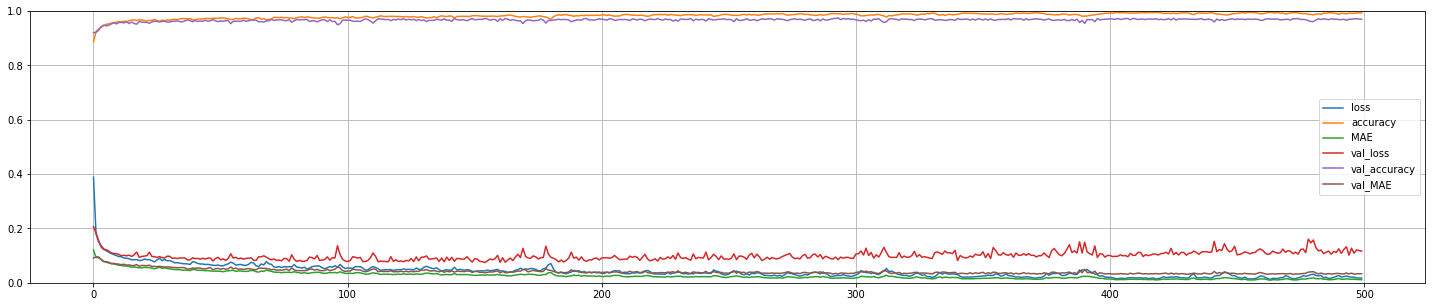

In [86]:
pd.DataFrame(history.history).plot(figsize=(25,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

<AxesSubplot:>

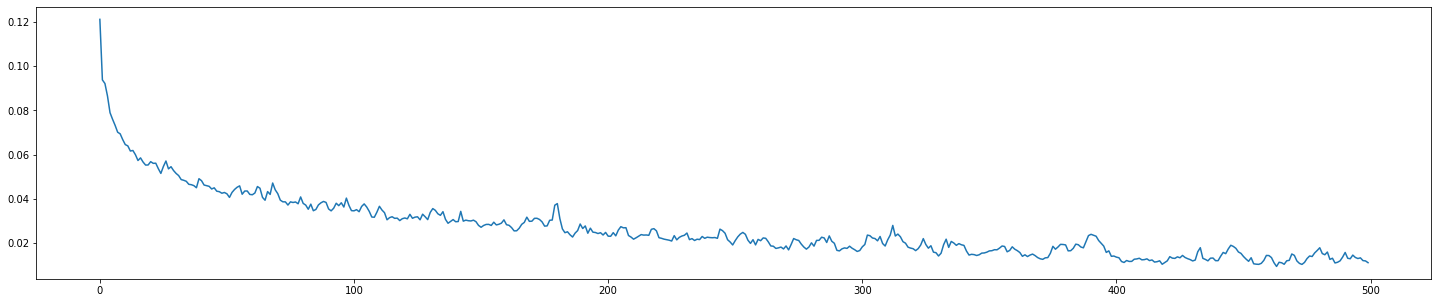

In [88]:
plt.figure(figsize=(25,5))
sns.lineplot(x=history.epoch, y=history.history['MAE'])

In [89]:
model.evaluate(x_test, y_test)

110/110 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9696 - MAE: 0.0351


[0.127187579870224, 0.9696187973022461, 0.035068247467279434]

<AxesSubplot:>

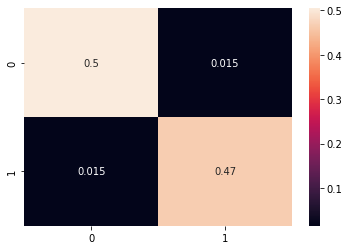

In [90]:
from sklearn.metrics import confusion_matrix

y_true = np.array(y_test).reshape([len(y_test), 1])
y_pred = [1 if x>.5 else 0 for x in model.predict(x_test)]

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm/np.sum(cm), annot=True)